# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df  =  pd.read_csv("./orders.csv")
print(df.head(),df.shape)

df['ave_order_value'] = df['order_value']/df['total_items']
df['order_value'].mean()

   order_id  shop_id  user_id  order_value  total_items payment_method  \
0         1       53      746          224            2           cash   
1         2       92      925           90            1           cash   
2         3       44      861          144            1           cash   
3         4       18      935          156            1    credit_card   
4         5       18      883          156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11   (5000, 7)


3145.128

25th Percentile (Q1): 133.0
Median (Q2): 153.0
75th Percentile (Q3): 169.0
Mean: 387.7428
Max Value: 25725.0
Min Value: 90.0


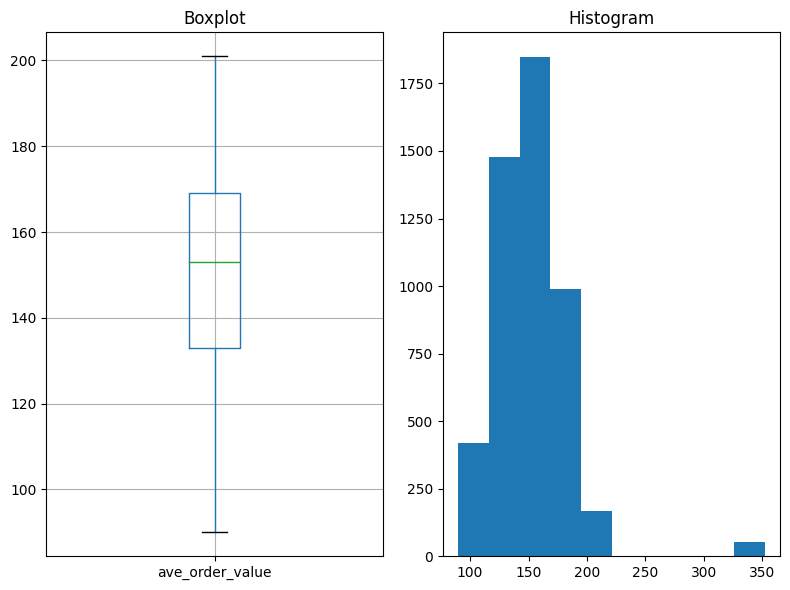

In [32]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='ave_order_value', showfliers=False)
plt.title('Boxplot')

filtered_data = df[df['ave_order_value'] <= 5000]
plt.subplot(1, 2, 2)
plt.hist(filtered_data['ave_order_value'], bins=10) 
plt.title('Histogram')

quartiles = df['ave_order_value'].quantile([0.25, 0.5, 0.75])
mean = df['ave_order_value'].mean()
max_value = df['ave_order_value'].max()
min_value = df['ave_order_value'].min()

print(f"25th Percentile (Q1): {quartiles[0.25]}")
print(f"Median (Q2): {quartiles[0.5]}")
print(f"75th Percentile (Q3): {quartiles[0.75]}")
print(f"Mean: {mean}")
print(f"Max Value: {max_value}")
print(f"Min Value: {min_value}")

plt.tight_layout()
plt.show()

In [31]:
order_average=df['order_value'].sum()/df['total_items'].sum()
print(order_average)


357.92152221412965


387.7428

The AOV is not a good metric because it only calculates the average of each order value, without considering how many items the customers have bought. For example, a customer bought 30 sneakers, the AOV will take the price of 30 sneakers as one, which dramatically increases the average price for the sneakers. The true average price for each item is 357.74 and the boxplot and histogram are listed above.

Two better metrics may be the average value for each item and how many items the customers buy.

In [40]:
df["created_at"] =  pd.to_datetime(df['created_at'])
df['date_only'] = df['created_at'].dt.date

ratio_df = df.groupby("date_only")["order_value"].sum()/df.groupby("date_only")["total_items"].sum()
ratio_df
num_df = df.groupby("date_only")["total_items"].sum()


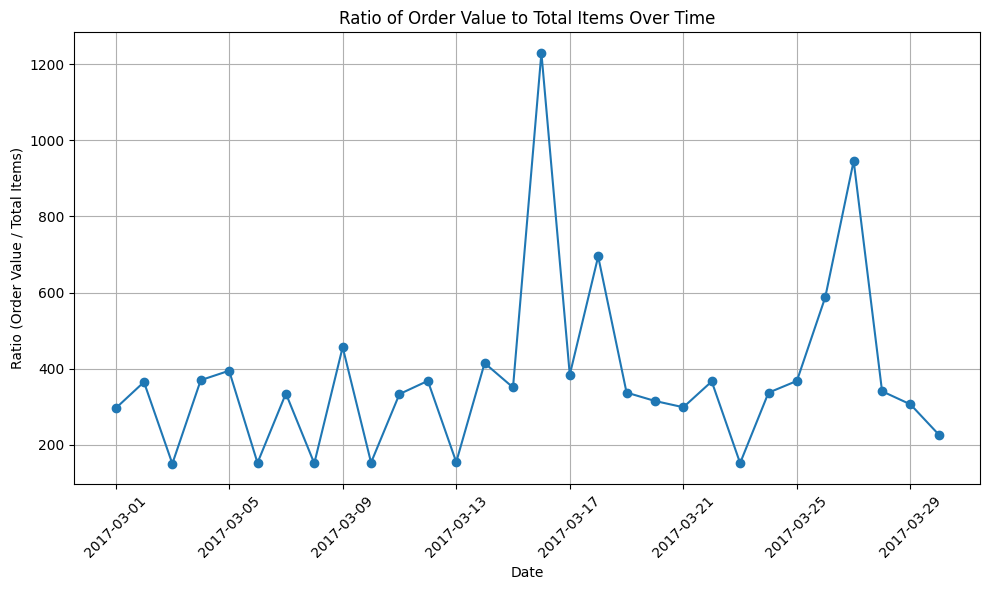

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(ratio_df.index, ratio_df.values,label = 'ave',marker='o', linestyle='-')
# plt.plot(num_df.index, num_df.values, label='num', marker='s', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Ratio (Order Value / Total Items)")
plt.title("Ratio of Order Value to Total Items Over Time")
plt.xticks(rotation=45) 

plt.grid(True)
plt.tight_layout()
plt.show()

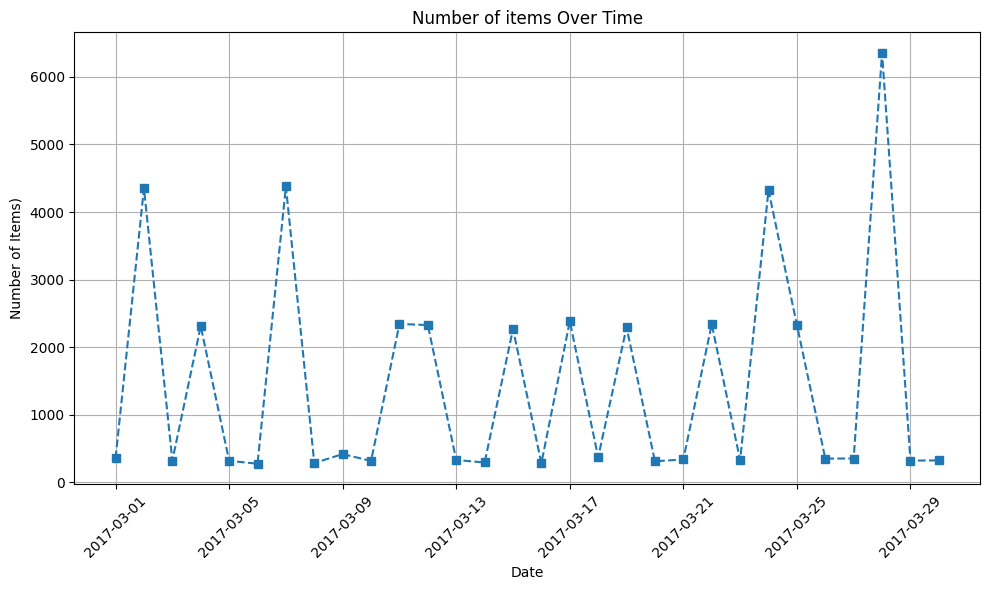

In [44]:
plt.figure(figsize=(10, 6))
# plt.plot(ratio_df.index, ratio_df.values,label = 'ave',marker='o', linestyle='-')
plt.plot(num_df.index, num_df.values, label='num', marker='s', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Number of Items)")
plt.title("Number of items Over Time")
plt.xticks(rotation=45) 

plt.grid(True)
plt.tight_layout()
plt.show()

It seems that except for some extreme values, the custmers' shopping behavior is periodic. 